<a href="https://colab.research.google.com/github/fellipemacs/fellipemacedo/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2022-03-09/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de identificação gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de identificação do proprietário (inquilino) do imóvel
* `host_name` - Nome do proprietário (inquilino)
* `neighbourhood_group` - Coluna sem valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipo de quarto que é oferecido
* `price` - Preço de aluguel do imóvel
* `minimum_nights` - Quantidade mínima de noites para hospedagem
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietário
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias (1 ano)
* `license` - número de licença

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3189532,VIEW! SUN! SILENCE! SPACE! 11ème!,2987420,Mathieu,NaN,Popincourt,48.868549,2.377758,Entire home/apt,90,4,3,2022-03-06,1.18,1,62,3,7511105987553
1,3288986,Lovely Flat Saint-Germain/Odeon,15919106,Théo,NaN,Luxembourg,48.856840,2.335390,Entire home/apt,190,2,144,2022-02-13,1.53,1,284,12,7510600075343
2,3079808,"110 m2, Centre Paris-Marais, 4 pers",5329959,Hélène,NaN,Bourse,48.866960,2.352810,Entire home/apt,250,2,42,2022-01-02,0.44,1,300,1,7510300426309
3,3080167,Cosy Apartment Promenade des Arts,4949756,Philippe,NaN,Reuilly,48.849180,2.372020,Entire home/apt,90,365,0,NaN,NaN,1,0,0,NaN
4,3289756,LOFT 140m² TERRASSE,16621346,David,NaN,Buttes-Chaumont,48.875810,2.387910,Entire home/apt,250,5,12,2022-01-05,0.13,1,294,2,7511903078521


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset

df.dtypes

Entradas:	 51305
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.434363
reviews_per_month                 0.209941
last_review                       0.209941
host_name                         0.001481
name                              0.000799
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

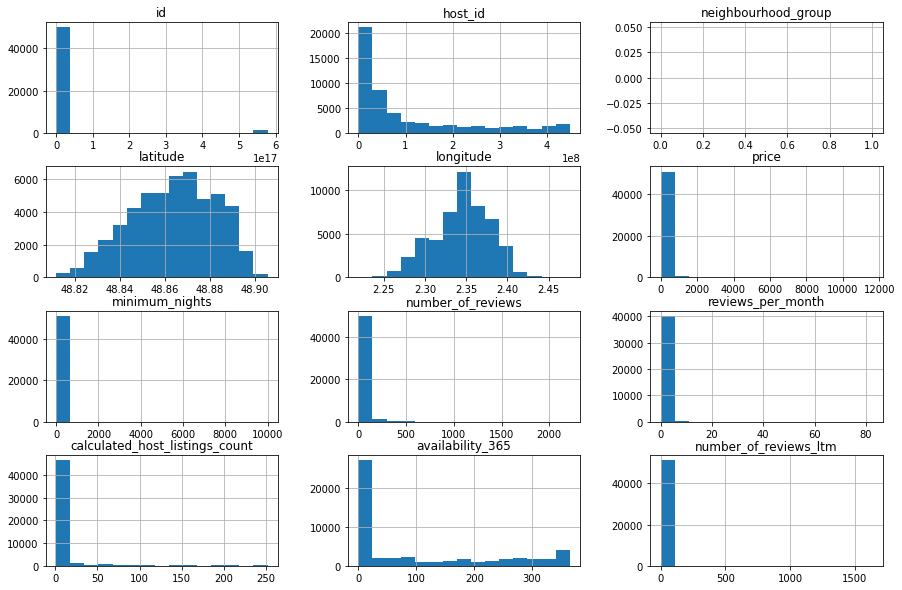

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Verificando presença de outliers** 



In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,51305.000000,51305.000000,51305.000000,40534.000000,51305.000000,51305.000000
mean,136.794991,101.901900,22.877946,0.813240,9.922327,99.834363
std,267.486307,164.953457,49.116974,1.382191,33.576544,129.207467
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,62.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,90.000000,4.000000,6.000000,0.380000,1.000000,12.000000
75%,142.000000,365.000000,23.000000,1.000000,2.000000,208.000000
max,11600.000000,9999.000000,2215.000000,82.350000,252.000000,365.000000


* A variável `price` possui 75% do valor em 142 e seu valor máximo é 11600
* A varável `minimum_nights` tem valores máximos acima de 365 dias no ano.

#### Boxplot para minimum_nights e price

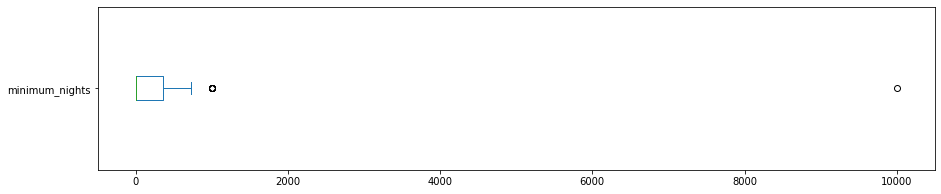

minimum_nights: valores acima de 365:
19 entradas
0.0370%


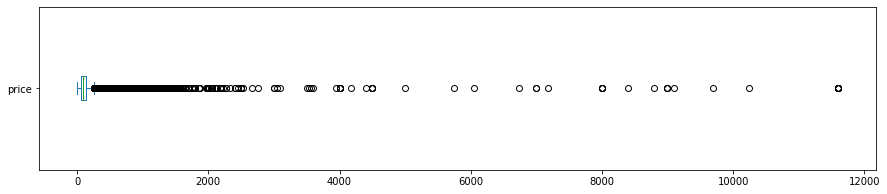


price: valores acima de 500
1229 entradas
2.3955%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 365 dias para minimum_nights
print("minimum_nights: valores acima de 365:")
print("{} entradas".format(len(df[df.minimum_nights > 365])))
print("{:.4f}%".format((len(df[df.minimum_nights > 365]) / df.shape[0])*100))


# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

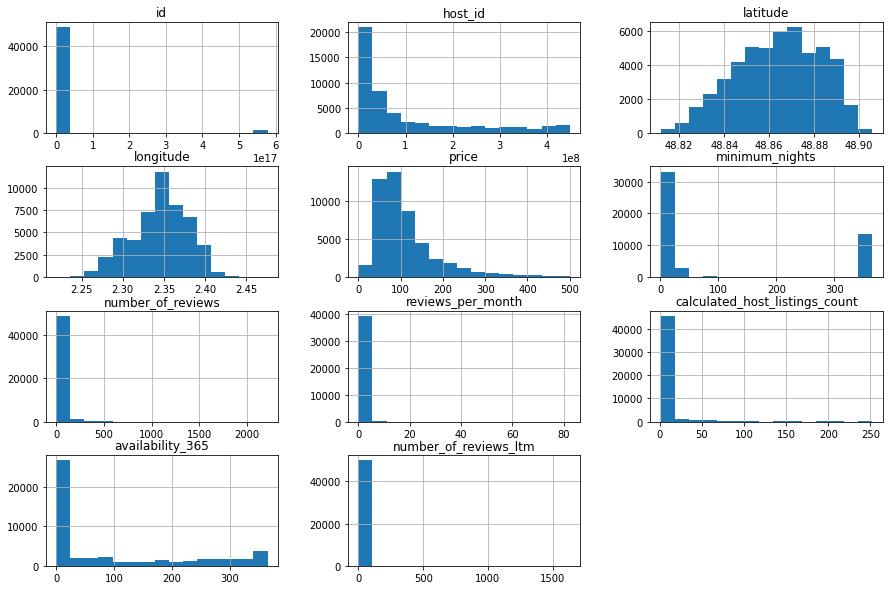

In [ ]:
# remover os *outliers* em um novo DataFrame
df.drop(df[df.minimum_nights > 365].index, axis=0, inplace=True)
df.drop(df[df.price > 500].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df['price'].mean()

136.79499074164312

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.169952,0.032934,0.072617,0.176560,0.292974
minimum_nights,-0.169952,1.000000,-0.202692,-0.249563,-0.118881,-0.240683
number_of_reviews,0.032934,-0.202692,1.000000,0.611074,-0.016102,0.133073
reviews_per_month,0.072617,-0.249563,0.611074,1.000000,0.076909,0.235207
calculated_host_listings_count,0.176560,-0.118881,-0.016102,0.076909,1.000000,0.210472
availability_365,0.292974,-0.240683,0.133073,0.235207,0.210472,1.000000


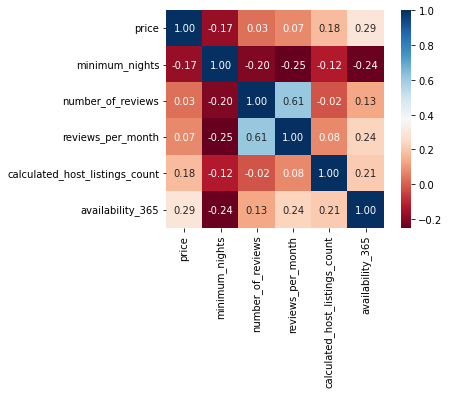

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    41458
Private room        7186
Hotel room          1073
Shared room          340
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts( ) / df.shape[0]

Entire home/apt    0.828216
Private room       0.143556
Hotel room         0.021436
Shared room        0.006792
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Louvre                 171.704291
Élysée                 170.508734
Luxembourg             157.001331
Hôtel-de-Ville         153.790453
Palais-Bourbon         151.404289
Bourse                 146.815494
Temple                 144.959532
Panthéon               135.858402
Opéra                  135.751610
Passy                  133.952089
Vaugirard              110.375492
Entrepôt               105.229466
Batignolles-Monceau    103.731899
Popincourt              97.970418
Observatoire            97.614811
Reuilly                 90.883270
Buttes-Montmartre       89.383302
Gobelins                87.064709
Buttes-Chaumont         78.219428
Ménilmontant            77.311510
Name: price, dtype: float64

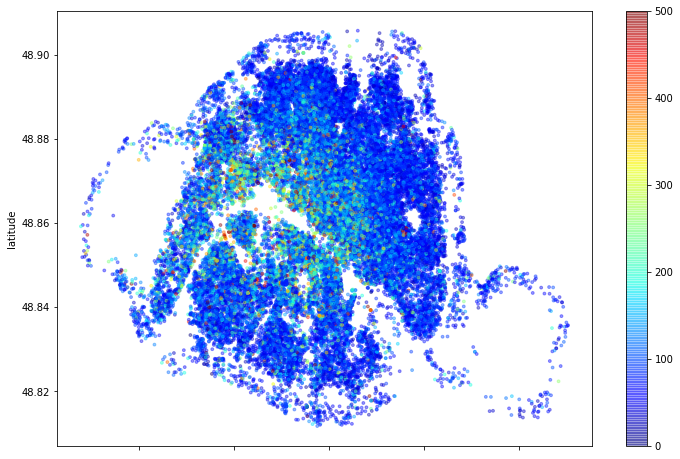

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

103.07255728469545

## Conclusões


Analisando os dados do Airbnb na cidade de Paris-França, é possível constatar que a disponibilidade de imóveis do tipo home/apt (casa/apartamento), representa 82% da totalidade de alugueis disponíveis.

Isso mostra a preferência dos locatários por outros tipos de hospedagem como: quartos privados (14% de disponibilidade), quarto de hotel (2% de disponibilidade), quartos compartilhados (0,6% de disponibilidade).

A média de preços são mais elevadas em bairros mais o centro de Paris, onde estão situados os mais famosos pontos históricos da cidade.